In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# scienticfic opertions
import warnings
import pylab
# sns of seaborn not working for train1
from datetime import datetime
from matplotlib.text import Text
from matplotlib.legend_handler import HandlerBase
import matplotlib as mpl
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import pickle
from sklearn.metrics import accuracy_score

In [52]:
train1=pd.read_csv("./orders.csv")
train1.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [53]:
train1 = train1.fillna(0)

In [54]:
train2=pd.read_csv("./order_products__train.csv")
train2.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


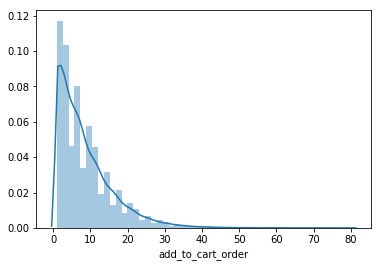

In [55]:
sns.distplot(train2['add_to_cart_order'])

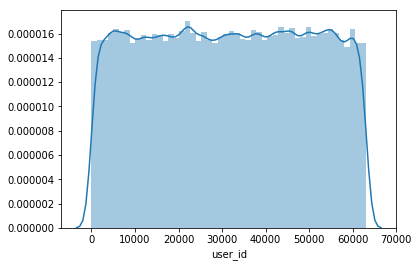

In [56]:
sns.distplot(train1['user_id'])

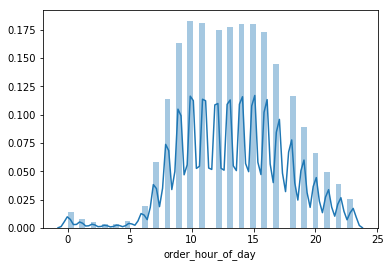

In [57]:
sns.distplot(train1['order_hour_of_day'])

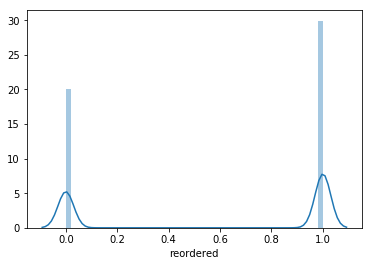

In [58]:
sns.distplot(train2['reordered'])

In [59]:
from sklearn.preprocessing import LabelEncoder
train2['add_to_cart_order'] = LabelEncoder().fit_transform(train2['add_to_cart_order']) 
train2['reordered'] = LabelEncoder().fit_transform(train2['reordered'])
# LabelEncoder for depicting that the values are not continous and assigns value to it

In [60]:
data = train2
data_corr = data.corr()
data_corr
# for large values to smaller scalable

,order_id,product_id,add_to_cart_order,reordered
order_id,1.000000,-0.000051,-0.000774,0.001678
product_id,-0.000051,1.000000,0.003720,0.006140
add_to_cart_order,-0.000774,0.003720,1.000000,-0.146000
reordered,0.001678,0.006140,-0.146000,1.000000


In [61]:
x1 = train2[['add_to_cart_order']]
y1 = train2['reordered']
#predict on add to cart

In [62]:
x2 = train1[['user_id', 'order_hour_of_day']]
y2 = train2['reordered']
#predict on user_id and order of day

In [63]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=1/3, random_state=0) 
# random no for dividing test and train data
#defined training of y as 1/3rd or test

In [64]:
from sklearn.preprocessing import StandardScaler
sc_x1 = StandardScaler()
x1_train = sc_x1.fit_transform(x1_train)
x1_test = sc_x1.transform(x1_test)
#standard scalar is used for mean=0 and std deviation=1 (normalization and for when units are diff but us is only normalizaion)

In [65]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x1_train, y1_train)
# aplly linear regression on train data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [66]:
y_pred = regressor.predict(x1_test)
# predict y on the basis of the train data

In [67]:
from sklearn.metrics import r2_score
r2_score(y1_test, y_pred)
#with r^2 error

0.021560061459489743

In [68]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(x1_train, y1_train)
# logistic regresison

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [69]:
y_pred = regressor.predict(x1_test)
from sklearn.metrics import r2_score
r2_score(y1_test, y_pred)
accuracy_score(y1_test, y_pred)
# logistic prediction with r2

0.6050280466517428

In [70]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(x1_train, y1_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [71]:
y_pred = clf.predict(x1_test)
from sklearn.metrics import r2_score
r2_score(y1_test, y_pred)
accuracy_score(y1_test, y_pred)

0.6052917453702245

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)
clf.fit(x1_train, y1_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [73]:
y_pred = clf.predict(x1_test)
from sklearn.metrics import r2_score
r2_score(y1_test, y_pred)
accuracy_score(y1_test, y_pred)

0.6045665738944002

In [74]:
from sklearn import tree
classifier = tree.DecisionTreeClassifier()
classifier.fit(x1_train, y1_train)
#desicion tree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [75]:
y_pred = classifier.predict(x1_test)
from sklearn.metrics import r2_score
r2_score(y1_test, y_pred)
accuracy_score(y1_test, y_pred)
#desicion tree with r^2

0.6045579750231453